
<font color=Blue>__Overarching Goal__</font>: To build a Logistic Regression model that can predict the survival of passengers on Titanic using Python from thet training and test dataset botained from Kaggle.

<font color=Blue>__Objectives__</font>: 
1. Exploratory analysis: Visualize the data 
2. Prepare the data for model
3. Train and test the model
4. Conclusions

**Step 1: Importing all the required Python Libraries**

The first step is to import all the libraries that I will require for data ingestion, visualization 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Step 2: Import the dataset**

Now I will import the training and testing dataset which in the form of .csv files downloaded from Kaggle and check them

In [38]:
train_titanic = pd.read_csv('train.csv')

In [39]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<font color=blue>As you can notice there are 891 entries and we have missing or null values for Age, Cabin and Embarked columns. At this stage we will focus on 'Age' column since it is numeric and probably more significant predictor</font>

**Step 3: Plot Age column and treat the missing values**

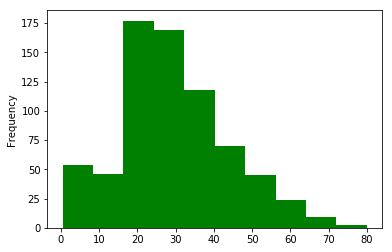

In [40]:
train_titanic['Age'].plot.hist(color='green')


<font color=Blue>Let's check the average age of the passengers</font>

In [41]:
train_titanic['Age'].mean()

29.69911764705882

<font color=blue>For the simplicity we will replace all the missing values in age column with the average value</font>

In [42]:
train_titanic['Age'].fillna(train_titanic['Age'].mean(),inplace=True)

In [43]:
train_titanic['Age'].isnull().value_counts()

False    891
Name: Age, dtype: int64

**Step 4:Exploratory Analysis**

<font color=Blue>We will develop some plots to vizualize the data and get some more information</font>

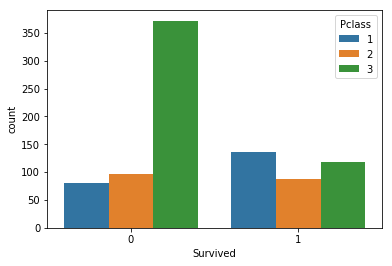

In [44]:
sns.countplot(x='Survived',hue='Pclass',data=train_titanic)

<font color=blue>As we can see in the above plot, number of passengers that did not survived was highest for the 3rd class. Similarly, other plots can be developed to get more inferences.</font>

**Step 5: Develop a logistic regression model**

In [45]:
train_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
#specify dependent (y) and independent variables (x). To make a simple model we only selected integer and float values as 
#dependent varibles
x = train_titanic[['Pclass','Age','SibSp','Parch','Fare']]
y = train_titanic['Survived']
titanic_model = LogisticRegression()
titanic_model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**Step 6: Make predctions and test them against test data**

In [48]:
#read the test data, check for missing data 
test_titanic = pd.read_csv("test.csv")
test_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<font color=blue>Following the same procedure, we will replace the missing age and fare values with the mean</font>

In [61]:
test_titanic['Age'].fillna(test_titanic['Age'].mean(),inplace = True)
test_titanic['Fare'].fillna(test_titanic['Fare'].mean(),inplace=True)

<font color=blue>Let's use heatmap to check if there are missing values </font>

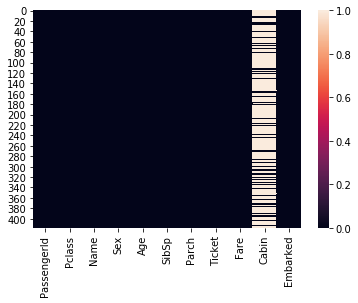

In [62]:
sns.heatmap(test_titanic.isnull())

<font color=blue>As we can see only Cabin has null values. Since we are not using cabin as a predictive variable, we will ignore that</font>

In [69]:
x1 = test_titanic[['Pclass','Age','SibSp','Parch','Fare']]

In [64]:
#make the predictions using the logistic model developed in last step
predictions = titanic_model.predict(x1)

**Step 7: Score the data**

In [67]:
from sklearn.metrics import classification_report

In [ ]:
##print(classificatio_report(predictions,y_test))